<a href="https://colab.research.google.com/github/sbal06/Fashion-MNIST/blob/New-Branch/VGG16ArchitectureFashionMNISTDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.5 MB/s eta 0:00:00


### **Set Up the Notebook**

In [1]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.layers import BatchNormalization
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### **Import and Prepare the Data**

In [2]:
(trainImages, trainLabels), (testImages, testLabels) = keras.datasets.fashion_mnist.load_data()

print("Train images shape is " + str(trainImages.shape))
print("Train labels shape is " + str(trainLabels.shape))
print("Test images shape is " + str(testImages.shape))
print("Test labels shape is " + str(testLabels.shape))
classes = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boots']

# convert training and testing to one-hot encoded values (helps transfer categorical to numerical values)
trainLabels = to_categorical(trainLabels, 10)
testLabels = to_categorical(testLabels, 10)

4422102/4422102 [==============================] - 1s 0us/step
Train images shape is (60000, 28, 28)
Train labels shape is (60000,)
Test images shape is (10000, 28, 28)
Test labels shape is (10000,)


In [ ]:
# Similar to the VGG-16 Architecture (16 layers deep, uses 16 layers in weight)
pool_size = 2
model = keras.Sequential([
Conv2D(32, kernel_size = (3,3), input_shape = (28, 28, 1), activation = 'relu', padding = 'same'),
Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'),
MaxPooling2D(pool_size = pool_size),
Dropout(0.1),
Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
MaxPooling2D(pool_size = pool_size),
Dropout(0.2),
Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
# Conv2D
MaxPooling2D(pool_size = pool_size),
Conv2D(256, kernel_size = (3,3), activation = 'relu', padding = 'same'),
Dropout(0.2),
Flatten(),
Dense(512, activation = 'relu'),
BatchNormalization(),
Dense(10, activation = 'softmax'),
])

# highest 93 percent accuracy with Convolutional layer (32, 32, 64, 64, 128, 128)

In [ ]:

batch_size = 128
epochs = 10
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(trainImages, trainLabels, batch_size = batch_size, epochs = epochs, validation_split = (0.1), shuffle = True)
_, score = model.evaluate(testImages, testLabels, verbose = 1)
print(score)


# print the shapes and the model's predictions.

Epoch 1/10
422/422 [==============================] - 396s 931ms/step - loss: 0.5405 - accuracy: 0.8029 - val_loss: 0.3695 - val_accuracy: 0.8730
Epoch 2/10
422/422 [==============================] - 386s 914ms/step - loss: 0.3097 - accuracy: 0.8891 - val_loss: 0.2563 - val_accuracy: 0.9078
Epoch 3/10
422/422 [==============================] - 383s 908ms/step - loss: 0.2596 - accuracy: 0.9065 - val_loss: 0.2649 - val_accuracy: 0.9078
Epoch 4/10
422/422 [==============================] - 381s 903ms/step - loss: 0.2272 - accuracy: 0.9175 - val_loss: 0.2305 - val_accuracy: 0.9173
Epoch 5/10
422/422 [==============================] - 382s 906ms/step - loss: 0.2040 - accuracy: 0.9247 - val_loss: 0.2047 - val_accuracy: 0.9278
Epoch 6/10
422/422 [==============================] - 382s 906ms/step - loss: 0.1922 - accuracy: 0.9305 - val_loss: 0.2420 - val_accuracy: 0.9107
Epoch 7/10
422/422 [==============================] - 384s 911ms/step - loss: 0.1786 - accuracy: 0.9344 - val_loss: 0.2042 -

### **Training and Testing Loss Graph**

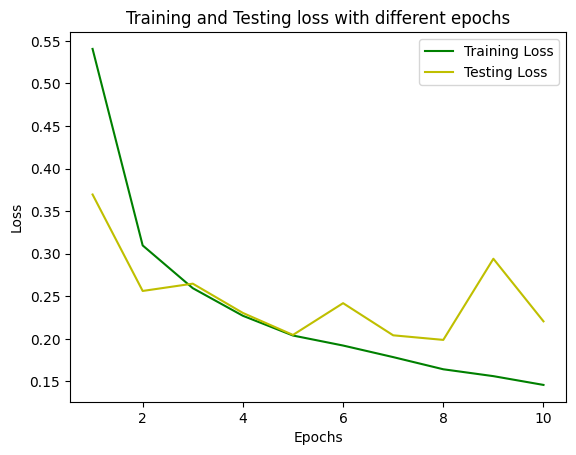

In [ ]:

training_loss = history.history['loss']
testing_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, color = 'g', label = 'Training Loss')
plt.plot(epoch_count, testing_loss, color = 'y', label = 'Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")
plt.title("Training and Testing loss with different epochs")
plt.show()


### **Training and Testing Accuracy Graph**

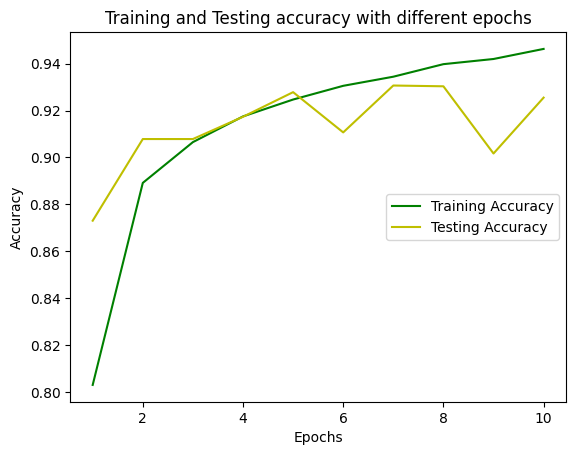

In [ ]:
# Training and Validation Accuracy Graph
training_accuracy = history.history['accuracy']
testing_accuracy = history.history['val_accuracy']

epoch_count = range(1, len(training_accuracy) + 1)
plt.plot(epoch_count, training_accuracy, color = 'g', label = 'Training Accuracy')
plt.plot(epoch_count, testing_accuracy, color = 'y', label = 'Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "center right")
plt.title("Training and Testing accuracy with different epochs")
plt.show()

### **Confusion Matrix**

313/313 [==============================] - 20s 63ms/step


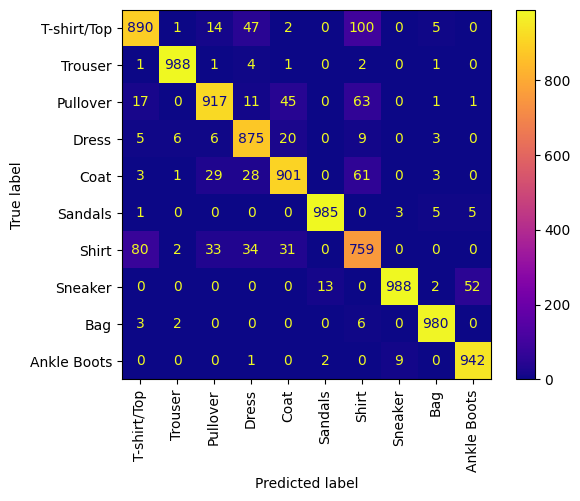

In [ ]:

y_pred = model.predict(testImages)
# the problem that is happening here is that y_pred is not one-hot-encoded, since it is a categorical variable.
# confusion_matrix = confusion_matrix(y_true = testLabels, y_pred = y_pred)

y_pred_classes = np.argmax(y_pred, axis = 1) # max of each probability in axis = 1 for 10000 test images
y_test_classes = np.argmax(testLabels, axis = 1)
confusion_mtx = confusion_matrix(y_pred_classes, y_test_classes)
display = ConfusionMatrixDisplay(confusion_mtx, display_labels = classes)
display.plot(cmap = 'plasma', xticks_rotation = 'vertical')





In [16]:
def reshape_image(image):
  reshaped_image = np.pad(image, ((2,2), (2,2)), mode = 'constant')

def reshape_images(images):
  reshaped_images =  [reshape_image(image) for image in images]

reshaped_train_images = reshape_images(trainImages)
reshaped_test_images= reshape_images(testImages)

In [10]:
# VGG 16 Architecture with SGD, I don't know if this will work?
model = Sequential()
vgg_model = VGG16(weights = None, input_shape = (32, 32, 1), include_top = False)
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax'))


